# Doc embedding evaluation (100 repositories / validation set)

## 1. Loading repository information

In [2]:
!pip install gdown
!gdown 12njH7JojRSgK6yzfHmhdZSrnfVN9x9NQ

Downloading...
From: https://drive.google.com/uc?id=12njH7JojRSgK6yzfHmhdZSrnfVN9x9NQ
To: /content/repo_info_validation.pkl
100% 51.4M/51.4M [00:00<00:00, 82.6MB/s]


In [3]:
import pickle

with open("repo_info_validation.pkl", "rb") as f:
    repo_info = pickle.load(f)
    f.close()

## 2. Download pre-trained model

In [4]:
!pip3 install torch
!pip3 install transformers
!wget https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py
# !curl -O https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 113.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.8 MB/s eta 0:00:00
--2023-07-09 18:05:32--  https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10352 (10K) [text/plain]
Saving to: ‘unixcoder.py’

unixcoder.py        100%[===================>]  10.11K  --.-KB/s    in 0s      

2023-07-09 18:05:32 (79.9 MB/s) - ‘unixcoder.py’ saved [10352/10352]



In [5]:
import torch

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cuda


In [6]:
unixcoder_model_names = [
    "Lazyhope/unixcoder-nine-advtest"
]

In [7]:
from unixcoder import UniXcoder

unixcoder_models = {}

# Initialise unixcoder model
for u_name in unixcoder_model_names:
    unixcoder_models[u_name] = UniXcoder(u_name)
    unixcoder_models[u_name].to(device)

## 3. Generating doc embeddings

In [8]:
# Getting doc embeddings
def get_unixcoder_embeddings(data, model):
    tokens_ids = model.tokenize([data], max_length=512, mode="<encoder-only>")
    source_ids = torch.tensor(tokens_ids).to(device)
    _, embeddings = model(source_ids)
    return embeddings

# Getting other embbeddings
def get_other_embeddings(data_list):
    embeddings = {}

    # Unixcoder model
    for u_name, u_model in tqdm(unixcoder_models.items()):
        print(f" - Using {u_name} model - ")
        embeddings_list = torch.concat([get_unixcoder_embeddings(data, u_model) for data in data_list])
        embeddings[u_name] = embeddings_list

    return embeddings


# Getting embeddings
def get_embeddings(input_data=None, input_mode=None):
    if input_data is None or not input_data:
        return torch.zeros((768,), device=device)

    with torch.no_grad():
        if input_mode == "docs":
            return get_other_embeddings(input_data)


In [9]:
from tqdm import tqdm

for repo_name, repo_dict in tqdm(repo_info.items()):
    print(f" - Generating doc embeddings for {repo_name} - ")
    repo_dict["docs_embeddings"] = get_embeddings(input_data=repo_dict["docs"], input_mode="docs")

  0%|          | 0/100 [00:00<?, ?it/s]

 - Generating doc embeddings for pyparsing/pyparsing - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



  1%|          | 1/100 [00:04<07:21,  4.46s/it]

 - Generating doc embeddings for JohnLangford/vowpal_wabbit - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



  2%|▏         | 2/100 [00:06<04:43,  2.89s/it]

 - Generating doc embeddings for django/channels - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



  3%|▎         | 3/100 [00:07<03:09,  1.95s/it]

 - Generating doc embeddings for gak/pycallgraph - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



  4%|▍         | 4/100 [00:07<02:07,  1.33s/it]

 - Generating doc embeddings for Microsoft/PTVS - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



  5%|▌         | 5/100 [00:08<02:06,  1.34s/it]

 - Generating doc embeddings for fabtools/fabtools - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



  6%|▌         | 6/100 [00:16<05:18,  3.38s/it]

 - Generating doc embeddings for indico/indico - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



  7%|▋         | 7/100 [00:29<10:29,  6.77s/it]

 - Generating doc embeddings for ray-project/ray - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



  8%|▊         | 8/100 [01:58<50:13, 32.75s/it]

 - Generating doc embeddings for PyMySQL/PyMySQL - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



  9%|▉         | 9/100 [01:59<34:35, 22.81s/it]

 - Generating doc embeddings for fxsjy/jieba - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 10%|█         | 10/100 [01:59<23:45, 15.83s/it]

 - Generating doc embeddings for tartiflette/tartiflette-asgi - 



100%|██████████| 1/1 [00:00<00:00, 67.28it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating doc embeddings for nose-devs/nose2 - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 12%|█▏        | 12/100 [02:01<12:52,  8.78s/it]

 - Generating doc embeddings for lepture/mistune - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 13%|█▎        | 13/100 [02:01<09:44,  6.71s/it]

 - Generating doc embeddings for worldveil/dejavu - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 14%|█▍        | 14/100 [02:02<07:28,  5.21s/it]

 - Generating doc embeddings for willmcgugan/rich - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 15%|█▌        | 15/100 [02:06<06:51,  4.85s/it]

 - Generating doc embeddings for PetrochukM/PyTorch-NLP - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 16%|█▌        | 16/100 [02:07<05:21,  3.83s/it]

 - Generating doc embeddings for ionelmc/python-hunter - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 17%|█▋        | 17/100 [02:08<04:14,  3.06s/it]

 - Generating doc embeddings for WhyNotHugo/python-barcode - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 18%|█▊        | 18/100 [02:09<03:07,  2.29s/it]

 - Generating doc embeddings for davedoesdev/python-jwt - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 19%|█▉        | 19/100 [02:09<02:25,  1.80s/it]

 - Generating doc embeddings for chriskiehl/Gooey - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 20%|██        | 20/100 [02:13<03:14,  2.44s/it]

 - Generating doc embeddings for jpadilla/pyjwt - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 21%|██        | 21/100 [02:14<02:27,  1.87s/it]

 - Generating doc embeddings for mindsdb/mindsdb - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 22%|██▏       | 22/100 [02:21<04:28,  3.45s/it]

 - Generating doc embeddings for facebookresearch/hydra - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 23%|██▎       | 23/100 [02:23<03:43,  2.91s/it]

 - Generating doc embeddings for Instagram/MonkeyType - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 24%|██▍       | 24/100 [02:24<03:01,  2.39s/it]

 - Generating doc embeddings for frewsxcv/python-geojson - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 25%|██▌       | 25/100 [02:24<02:16,  1.82s/it]

 - Generating doc embeddings for zostera/django-bootstrap4 - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 26%|██▌       | 26/100 [02:25<01:59,  1.62s/it]

 - Generating doc embeddings for google/pytype - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 27%|██▋       | 27/100 [02:37<05:27,  4.49s/it]

 - Generating doc embeddings for pricingassistant/mrq - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 28%|██▊       | 28/100 [02:37<04:02,  3.37s/it]

 - Generating doc embeddings for tylerlaberge/PyPattyrn - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 29%|██▉       | 29/100 [02:41<04:03,  3.43s/it]

 - Generating doc embeddings for mkdocs/mkdocs - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 30%|███       | 30/100 [02:43<03:29,  2.99s/it]

 - Generating doc embeddings for ionelmc/python-manhole - 



 31%|███       | 31/100 [02:43<02:28,  2.15s/it]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating doc embeddings for encode/uvicorn - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 32%|███▏      | 32/100 [02:43<01:49,  1.61s/it]

 - Generating doc embeddings for davidhalter/jedi - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 33%|███▎      | 33/100 [02:49<02:58,  2.66s/it]

 - Generating doc embeddings for tomerfiliba/rpyc - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 34%|███▍      | 34/100 [02:50<02:40,  2.42s/it]

 - Generating doc embeddings for python-greenlet/greenlet - 



100%|██████████| 1/1 [00:00<00:00, 16.03it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating doc embeddings for scottrogowski/code2flow - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 36%|███▌      | 36/100 [02:53<01:59,  1.87s/it]

 - Generating doc embeddings for jiaaro/pydub - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 37%|███▋      | 37/100 [02:53<01:36,  1.53s/it]

 - Generating doc embeddings for python-rope/rope - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 38%|███▊      | 38/100 [02:56<01:52,  1.82s/it]

 - Generating doc embeddings for scanny/python-pptx - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 39%|███▉      | 39/100 [03:12<05:47,  5.69s/it]

 - Generating doc embeddings for sshwsfc/xadmin - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 40%|████      | 40/100 [03:13<04:26,  4.44s/it]

 - Generating doc embeddings for klen/pylama - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 41%|████      | 41/100 [03:14<03:25,  3.48s/it]

 - Generating doc embeddings for django-compressor/django-compressor - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 42%|████▏     | 42/100 [03:15<02:39,  2.76s/it]

 - Generating doc embeddings for ahupp/python-magic - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 43%|████▎     | 43/100 [03:16<01:59,  2.10s/it]

 - Generating doc embeddings for ovalhub/pyicu - 



100%|██████████| 1/1 [00:00<00:00, 24.76it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating doc embeddings for lancopku/pkuseg-python - 



100%|██████████| 1/1 [00:00<00:00, 65.49it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating doc embeddings for chardet/chardet - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 46%|████▌     | 46/100 [03:16<00:53,  1.01it/s]

 - Generating doc embeddings for tqdm/tqdm - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 47%|████▋     | 47/100 [03:18<01:05,  1.23s/it]

 - Generating doc embeddings for peterbrittain/asciimatics - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 48%|████▊     | 48/100 [03:22<01:34,  1.82s/it]

 - Generating doc embeddings for rsalmei/alive-progress - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 49%|████▉     | 49/100 [03:23<01:20,  1.57s/it]

 - Generating doc embeddings for lxneng/alipay - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 50%|█████     | 50/100 [03:23<01:01,  1.22s/it]

 - Generating doc embeddings for beetbox/audioread - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 51%|█████     | 51/100 [03:24<00:50,  1.04s/it]

 - Generating doc embeddings for mitsuhiko/pluginbase - 



100%|██████████| 1/1 [00:00<00:00, 37.23it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating doc embeddings for coala/coala - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 53%|█████▎    | 53/100 [03:31<01:38,  2.10s/it]

 - Generating doc embeddings for aaugustin/websockets - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 54%|█████▍    | 54/100 [03:36<02:17,  2.98s/it]

 - Generating doc embeddings for ryanmcgrath/twython - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 55%|█████▌    | 55/100 [03:41<02:31,  3.36s/it]

 - Generating doc embeddings for JaidedAI/EasyOCR - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 56%|█████▌    | 56/100 [03:42<02:06,  2.87s/it]

 - Generating doc embeddings for python-pillow/Pillow - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 57%|█████▋    | 57/100 [03:47<02:18,  3.21s/it]

 - Generating doc embeddings for facebook/PathPicker - 



 58%|█████▊    | 58/100 [03:47<01:39,  2.36s/it]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating doc embeddings for NicolasHug/Surprise - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 59%|█████▉    | 59/100 [03:49<01:30,  2.21s/it]

 - Generating doc embeddings for daboth/pagan - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 60%|██████    | 60/100 [03:49<01:10,  1.77s/it]

 - Generating doc embeddings for gaojiuli/toapi - 



100%|██████████| 1/1 [00:00<00:00, 62.41it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating doc embeddings for flask-restful/flask-restful - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 62%|██████▏   | 62/100 [03:50<00:46,  1.21s/it]

 - Generating doc embeddings for dabeaz/ply - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 63%|██████▎   | 63/100 [03:59<01:48,  2.93s/it]

 - Generating doc embeddings for lorien/grab - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 64%|██████▍   | 64/100 [03:59<01:23,  2.32s/it]

 - Generating doc embeddings for dbcli/litecli - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 65%|██████▌   | 65/100 [04:00<01:09,  1.98s/it]

 - Generating doc embeddings for lemire/simdjson - 
 - Generating doc embeddings for secdev/scapy - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 67%|██████▋   | 67/100 [04:12<02:00,  3.64s/it]

 - Generating doc embeddings for jindaxiang/akshare - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 68%|██████▊   | 68/100 [04:36<04:30,  8.46s/it]

 - Generating doc embeddings for myusuf3/delorean - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 69%|██████▉   | 69/100 [04:36<03:17,  6.38s/it]

 - Generating doc embeddings for facebookresearch/pytext - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 70%|███████   | 70/100 [04:46<03:40,  7.35s/it]

 - Generating doc embeddings for psf/requests-html - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 71%|███████   | 71/100 [04:47<02:38,  5.46s/it]

 - Generating doc embeddings for vispy/vispy - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 72%|███████▏  | 72/100 [04:58<03:22,  7.24s/it]

 - Generating doc embeddings for joke2k/faker - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 73%|███████▎  | 73/100 [05:07<03:29,  7.75s/it]

 - Generating doc embeddings for Manisso/fsociety - 
 - Generating doc embeddings for crossbario/autobahn-python - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 75%|███████▌  | 75/100 [05:16<02:35,  6.22s/it]

 - Generating doc embeddings for encode/orm - 



100%|██████████| 1/1 [00:00<00:00, 18.50it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating doc embeddings for grantjenks/python-sortedcontainers - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 77%|███████▋  | 77/100 [05:17<01:33,  4.05s/it]

 - Generating doc embeddings for Delgan/loguru - 



100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating doc embeddings for ajenti/ajenti - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 79%|███████▉  | 79/100 [05:21<01:07,  3.21s/it]

 - Generating doc embeddings for mining/mining - 



 80%|████████  | 80/100 [05:21<00:51,  2.60s/it]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating doc embeddings for fogleman/Quads - 
 - Generating doc embeddings for andialbrecht/sqlparse - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 82%|████████▏ | 82/100 [05:22<00:32,  1.81s/it]

 - Generating doc embeddings for spyder-ide/spyder - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 83%|████████▎ | 83/100 [05:56<02:23,  8.45s/it]

 - Generating doc embeddings for timofurrer/try - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 84%|████████▍ | 84/100 [05:56<01:45,  6.57s/it]

 - Generating doc embeddings for tyiannak/pyAudioAnalysis - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 85%|████████▌ | 85/100 [05:57<01:17,  5.19s/it]

 - Generating doc embeddings for python/black - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 86%|████████▌ | 86/100 [05:59<01:02,  4.49s/it]

 - Generating doc embeddings for bloomberg/bqplot - 



100%|██████████| 1/1 [00:00<00:00, 11.29it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating doc embeddings for httplib2/httplib2 - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 88%|████████▊ | 88/100 [06:00<00:33,  2.77s/it]

 - Generating doc embeddings for pypa/virtualenv - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 89%|████████▉ | 89/100 [06:01<00:25,  2.34s/it]

 - Generating doc embeddings for scrapinghub/portia - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 90%|█████████ | 90/100 [06:03<00:21,  2.13s/it]

 - Generating doc embeddings for metawilm/cl-python - 
 - Generating doc embeddings for shazow/urllib3 - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 92%|█████████▏| 92/100 [06:06<00:16,  2.02s/it]

 - Generating doc embeddings for ponyorm/pony - 



 93%|█████████▎| 93/100 [06:07<00:11,  1.60s/it]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating doc embeddings for antocuni/pdb - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 94%|█████████▍| 94/100 [06:07<00:07,  1.24s/it]

 - Generating doc embeddings for elastic/elasticsearch-dsl-py - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 95%|█████████▌| 95/100 [06:08<00:06,  1.27s/it]

 - Generating doc embeddings for mstamy2/PyPDF2 - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 96%|█████████▌| 96/100 [06:11<00:06,  1.57s/it]

 - Generating doc embeddings for pytoolz/cytoolz - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 97%|█████████▋| 97/100 [06:11<00:03,  1.28s/it]

 - Generating doc embeddings for tartiflette/tartiflette-aiohttp - 
 - Generating doc embeddings for asweigart/pyautogui - 
 - Generating doc embeddings for pyeve/eve - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



100%|██████████| 100/100 [06:16<00:00,  3.76s/it]


## 4. Saving doc embeddings

In [10]:
# Change the tensor format to CPU
save_device = "cpu"

for repo_name, repo_dict in repo_info.items():
    if type(repo_dict["docs_embeddings"]) is torch.Tensor:
        repo_info[repo_name]["docs_embeddings"] = repo_info[repo_name]["docs_embeddings"].to(save_device)
    else:
        for model_name, model_tensor in repo_dict["docs_embeddings"].items():
            repo_info[repo_name]["docs_embeddings"][model_name] = model_tensor.to(save_device)

In [11]:
# Check the tensor format
for repo_name, repo_dict in repo_info.items():
    if type(repo_dict["docs_embeddings"]) is torch.Tensor:
        print(repo_dict["docs_embeddings"].get_device())
    else:
        for model_name, model_tensor in repo_dict["docs_embeddings"].items():
             print(repo_info[repo_name]["docs_embeddings"][model_name].get_device())

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1


In [12]:
with open("repo_info_validation_doc_embeddings.pkl", "wb") as f:
    pickle.dump(repo_info, f)
    f.close()

## 5. Calculating similarity

In [13]:
from torch.nn import CosineSimilarity
from itertools import combinations
import pandas as pd

cossim = CosineSimilarity(dim=0, eps=1e-8)
res = []
num_of_repos = len(repo_info)
num_of_rows = num_of_repos * (num_of_repos - 1) // 2

models = unixcoder_model_names

for repo1, repo2 in tqdm(combinations(repo_info.keys(), 2), total=num_of_rows):
    row = [repo1, repo2, repo_info[repo1]["topic"], repo_info[repo2]["topic"]]
    for model_name in models:

        if type(repo_info[repo1]["docs_embeddings"]) is torch.Tensor:
            embedding1 = repo_info[repo1]["docs_embeddings"]
        else:
            embedding1 = torch.mean(repo_info[repo1]["docs_embeddings"][model_name], dim=0)

        if type(repo_info[repo2]["docs_embeddings"]) is torch.Tensor:
            embedding2 = repo_info[repo2]["docs_embeddings"]
        else:
            embedding2 = torch.mean(repo_info[repo2]["docs_embeddings"][model_name], dim=0)

        similarity = cossim(embedding1, embedding2).cpu().detach().numpy().item()
        row.append(similarity)

    res.append(row)

df = pd.DataFrame(res, columns=["repo1", "repo2", "topic1", "topic2"] + models)
df

100%|██████████| 4950/4950 [00:00<00:00, 7723.06it/s]


,repo1,repo2,topic1,topic2,Lazyhope/unixcoder-nine-advtest
0,pyparsing/pyparsing,JohnLangford/vowpal_wabbit,Parser,Machine Learning,0.206592
1,pyparsing/pyparsing,django/channels,Parser,WebSocket,-0.043911
2,pyparsing/pyparsing,gak/pycallgraph,Parser,Code Analysis,0.255868
3,pyparsing/pyparsing,Microsoft/PTVS,Parser,Visual Studio,0.417160
4,pyparsing/pyparsing,fabtools/fabtools,Parser,SSH-style Deployment,-0.053981
...,...,...,...,...,...
4945,pytoolz/cytoolz,asweigart/pyautogui,Functional Programming,GUI / Web Testing,0.000000
4946,pytoolz/cytoolz,pyeve/eve,Functional Programming,Flask,0.248503
4947,tartiflette/tartiflette-aiohttp,asweigart/pyautogui,GraphQL,GUI / Web Testing,0.000000
4948,tartiflette/tartiflette-aiohttp,pyeve/eve,GraphQL,Flask,0.000000


In [14]:
df.dropna(inplace=True, subset=models)
df.reset_index(drop=True, inplace=True)
df

,repo1,repo2,topic1,topic2,Lazyhope/unixcoder-nine-advtest
0,pyparsing/pyparsing,JohnLangford/vowpal_wabbit,Parser,Machine Learning,0.206592
1,pyparsing/pyparsing,django/channels,Parser,WebSocket,-0.043911
2,pyparsing/pyparsing,gak/pycallgraph,Parser,Code Analysis,0.255868
3,pyparsing/pyparsing,Microsoft/PTVS,Parser,Visual Studio,0.417160
4,pyparsing/pyparsing,fabtools/fabtools,Parser,SSH-style Deployment,-0.053981
...,...,...,...,...,...
4945,pytoolz/cytoolz,asweigart/pyautogui,Functional Programming,GUI / Web Testing,0.000000
4946,pytoolz/cytoolz,pyeve/eve,Functional Programming,Flask,0.248503
4947,tartiflette/tartiflette-aiohttp,asweigart/pyautogui,GraphQL,GUI / Web Testing,0.000000
4948,tartiflette/tartiflette-aiohttp,pyeve/eve,GraphQL,Flask,0.000000


In [15]:
df.to_csv("doc_embedding_evaluation_validation_100.csv")

## 6. Evaluating different models

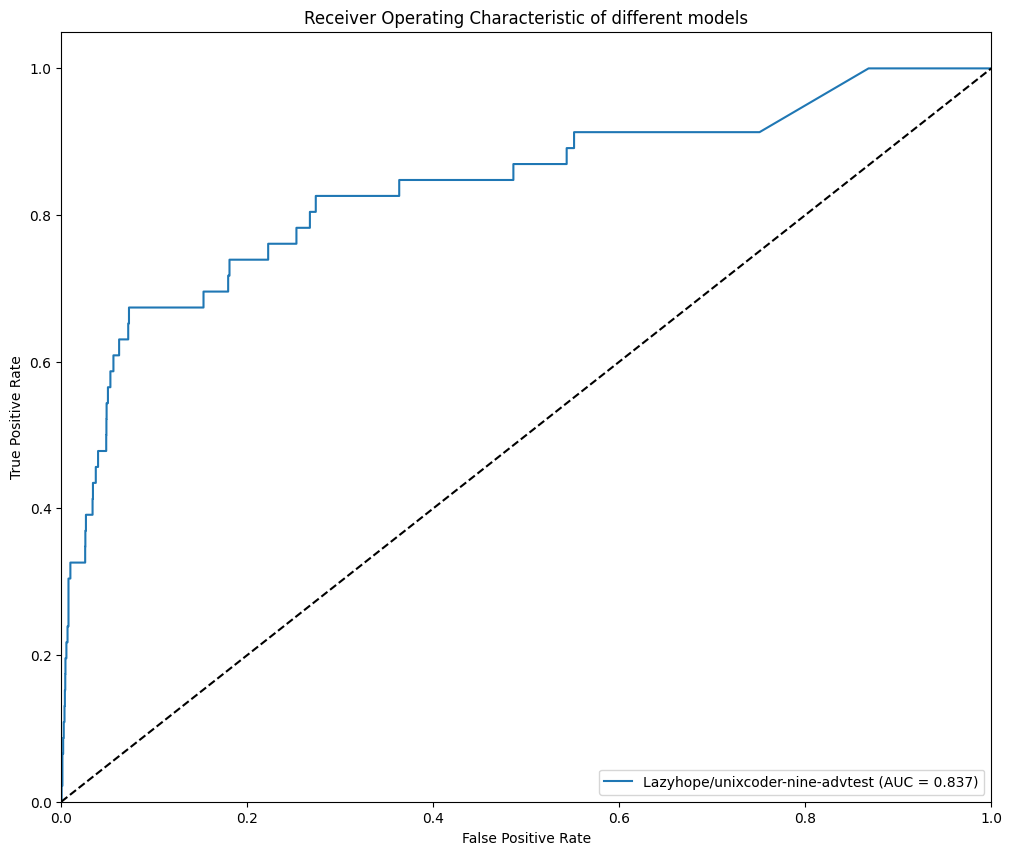

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


model_auc = {}
y_true = df['topic1'] == df['topic2']
fig = plt.figure(figsize=(12, 10))

def roc(model_name):
    y_score = df[model_name]
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    model_auc[model_name] = roc_auc

    plt.plot(fpr, tpr, label=model_name)

for model in models:
    roc(model)

# Order labels by each model's auc score
handles, labels = plt.gca().get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda k: -model_auc[labels[k]])
ordered_handles = [handles[idx] for idx in order]
ordered_labels = [f'{labels[idx]} (AUC = {model_auc[labels[idx]]:.3f})' for idx in order]
plt.legend(ordered_handles, ordered_labels, loc="lower right")

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic of different models')
plt.savefig('roc_doc_evaluation_validation_100.png')
plt.show()

In [17]:
model_auc

{'Lazyhope/unixcoder-nine-advtest': 0.8366373501666785}